#### Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()



,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_Twenty'] = df[variable].fillna(20)
    

 
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

##### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [9]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_Twenty'] = df[variable].fillna(20)
    

In [12]:
impute_nan(df,'Age')

In [13]:
df

,Survived,Age,Fare,Age_zero,Age_hundred,Age_Twenty
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,27.0
887,1,19.0,30.0000,19.0,19.0,19.0
888,0,NaN,23.4500,0.0,100.0,20.0
889,1,26.0,30.0000,26.0,26.0,26.0


In [14]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Age_zero,Age_hundred,Age_Twenty
5,0,NaN,8.4583,0.0,100.0,20.0
17,1,NaN,13.0000,0.0,100.0,20.0
19,1,NaN,7.2250,0.0,100.0,20.0
26,0,NaN,7.2250,0.0,100.0,20.0
28,1,NaN,7.8792,0.0,100.0,20.0
...,...,...,...,...,...,...
859,0,NaN,7.2292,0.0,100.0,20.0
863,0,NaN,69.5500,0.0,100.0,20.0
868,0,NaN,9.5000,0.0,100.0,20.0
878,0,NaN,7.8958,0.0,100.0,20.0


In [16]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [17]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [84]:
df['GarageType'][0]

'Attchd'

In [18]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [34]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

<AxesSubplot:>

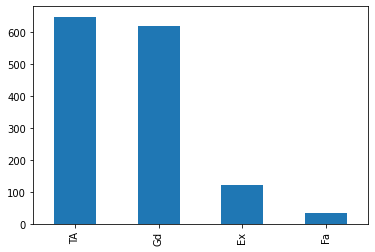

In [20]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

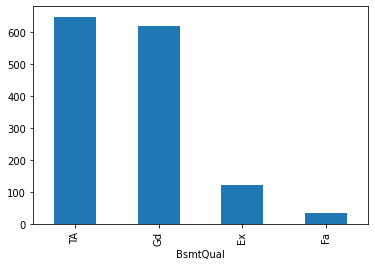

In [23]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

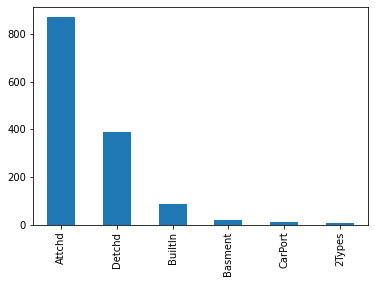

In [26]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

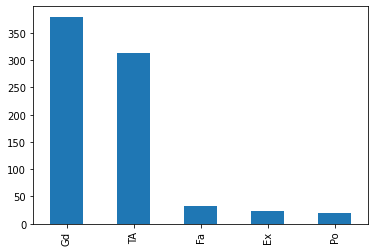

In [38]:
df['FireplaceQu'].value_counts().plot.bar()

In [27]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [30]:
df['GarageType'].mode()[0]

'Attchd'

In [34]:
def impute_nan(df,variable):
    print(variable)
    most_frequent_category=df[variable].mode()[0]
    print(f"most_frequent_category in column {variable} is {most_frequent_category}")
    print(f"nan values of column {variable} will be replaced by {most_frequent_category}")
    df[variable].fillna(most_frequent_category,inplace=True)

In [38]:
data = "sahil"
print("{data}")
print(f"{data}")

{data}
sahil


In [35]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

BsmtQual
most_frequent_category in column BsmtQual is TA
nan values of column BsmtQual will be replaced by TA
FireplaceQu
most_frequent_category in column FireplaceQu is Gd
nan values of column FireplaceQu will be replaced by Gd
GarageType
most_frequent_category in column GarageType is Attchd
nan values of column GarageType will be replaced by Attchd


In [36]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

##### Adding a variable to capture NAN

In [44]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [47]:
frequent = df['BsmtQual'].mode()[0]

In [48]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [50]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [51]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [94]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [95]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [96]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [97]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [98]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [99]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [100]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [101]:
df.isnull().sum()

SalePrice            0
BsmtQualnewvar       0
FireplaceQunewvar    0
GarageTypenewvar     0
dtype: int64